Load and Inspect Data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

In [101]:
#Load the dataset
df = pd.read_csv(r'D:\hair loss analysis project\data\Predict_Hair_Fall.csv')

In [102]:
print("Shape:", df.shape)

Shape: (999, 13)


In [103]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB
None


In [104]:
print("\nHead:")
print(df.head())


Head:
       Id Genetics Hormonal Changes Medical Conditions  \
0  133992      Yes               No            No Data   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   

  Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                  No Data      Magnesium deficiency  Moderate   19   
1              Antibiotics      Magnesium deficiency      High   43   
2         Antifungal Cream        Protein deficiency  Moderate   26   
3              Antibiotics        Biotin Deficiency   Moderate   46   
4                 Accutane           Iron deficiency  Moderate   30   

  Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   Hair Loss  
0                    Yes                   Yes      No           No          0  
1                    Yes                   Yes      No 

In [105]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [106]:
# Check for missing values
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [107]:
# Drop ID column
df.drop(columns=['Id'], inplace=True)

In [108]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Genetics                   999 non-null    object
 1   Hormonal Changes           999 non-null    object
 2   Medical Conditions         999 non-null    object
 3   Medications & Treatments   999 non-null    object
 4   Nutritional Deficiencies   999 non-null    object
 5   Stress                     999 non-null    object
 6   Age                        999 non-null    int64 
 7   Poor Hair Care Habits      999 non-null    object
 8   Environmental Factors      999 non-null    object
 9   Smoking                    999 non-null    object
 10  Weight Loss                999 non-null    object
 11  Hair Loss                  999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB
None


EDA and Visualisations

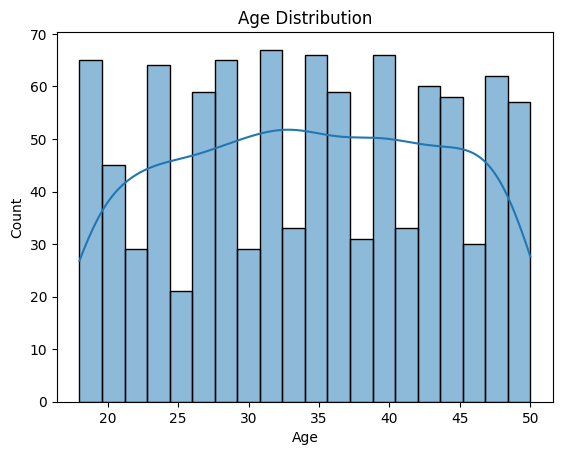

In [109]:
# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [110]:
df.columns = df.columns.str.strip()

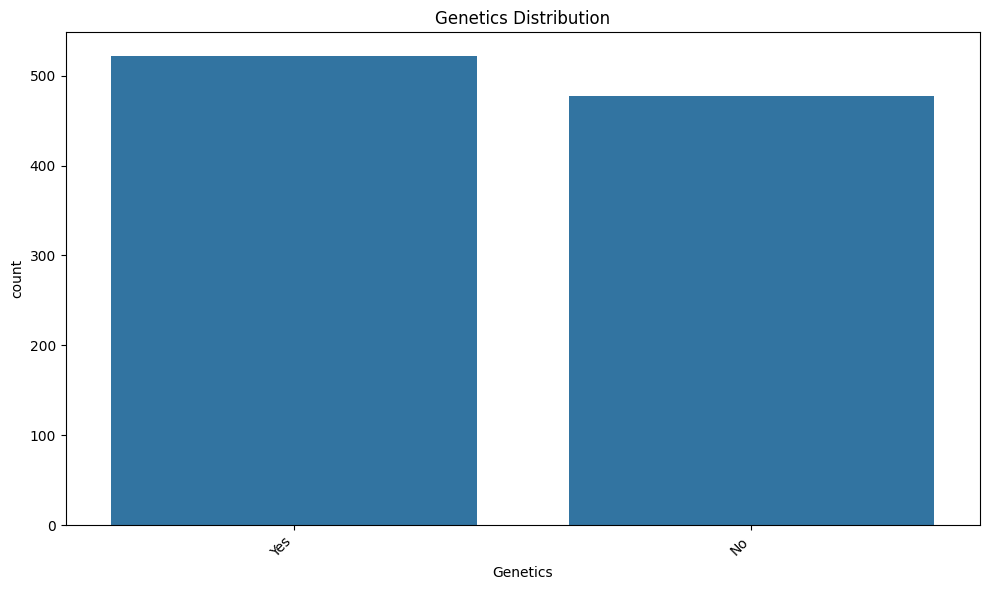

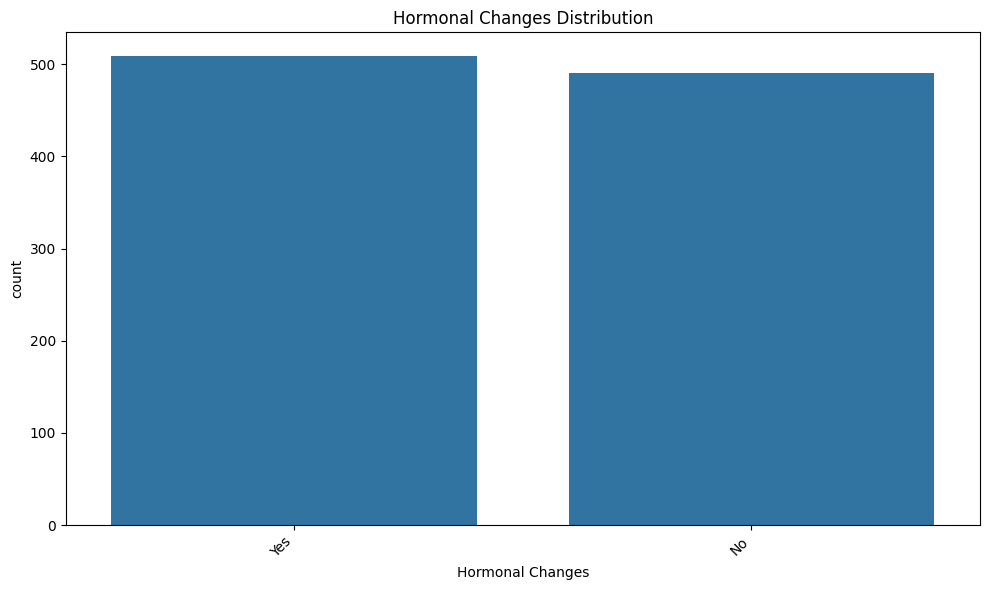

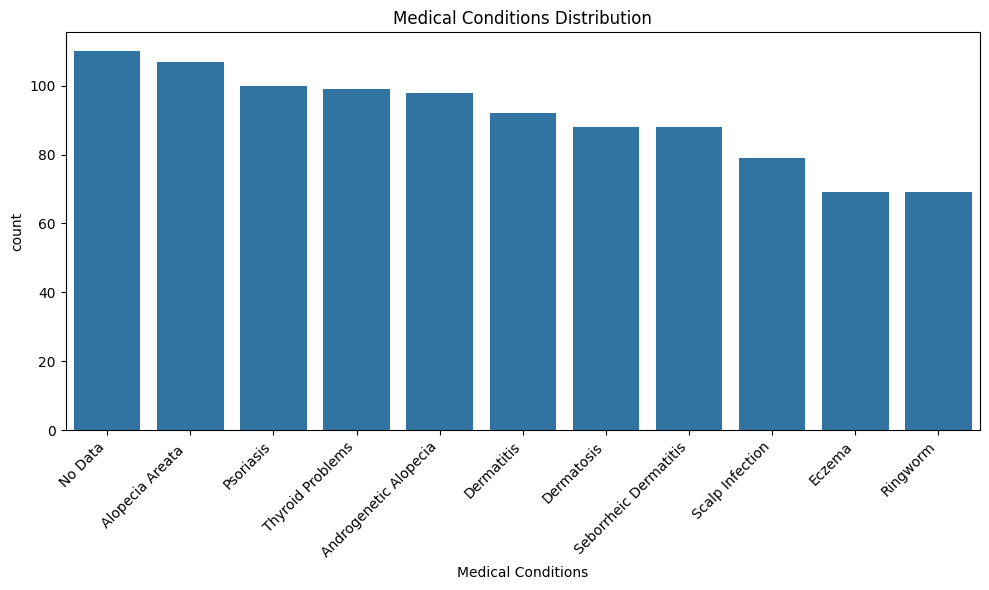

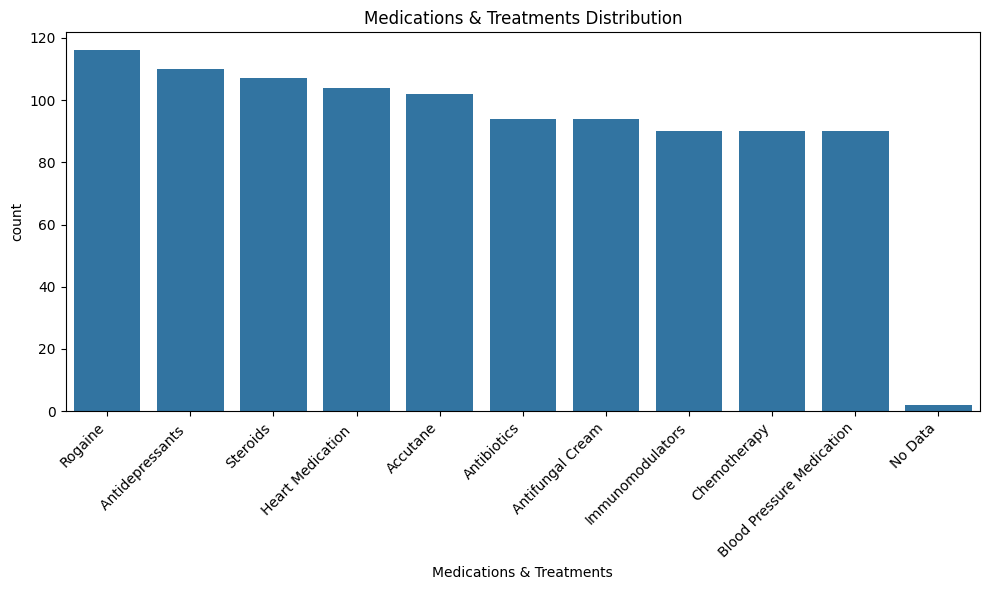

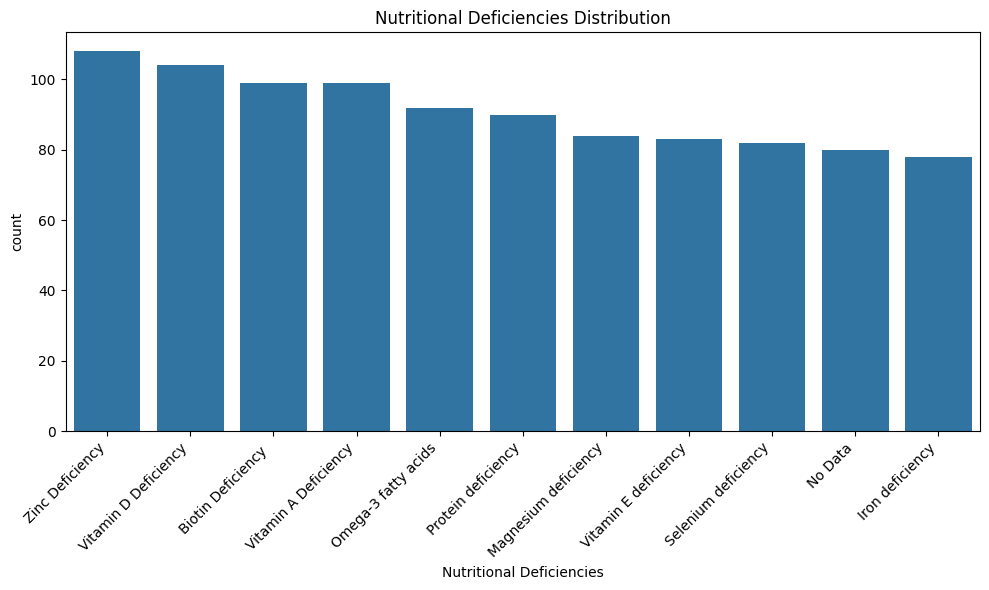

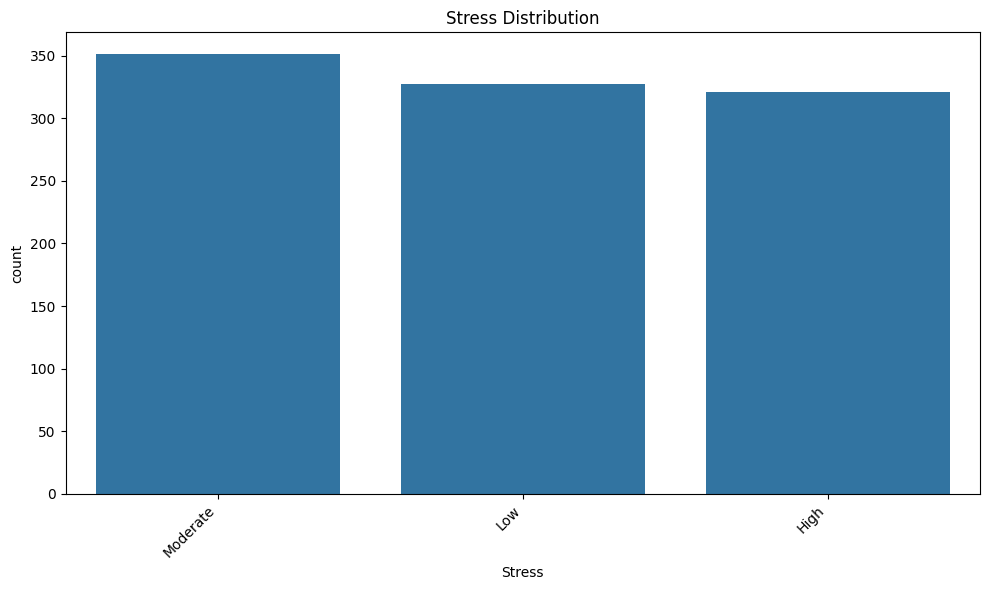

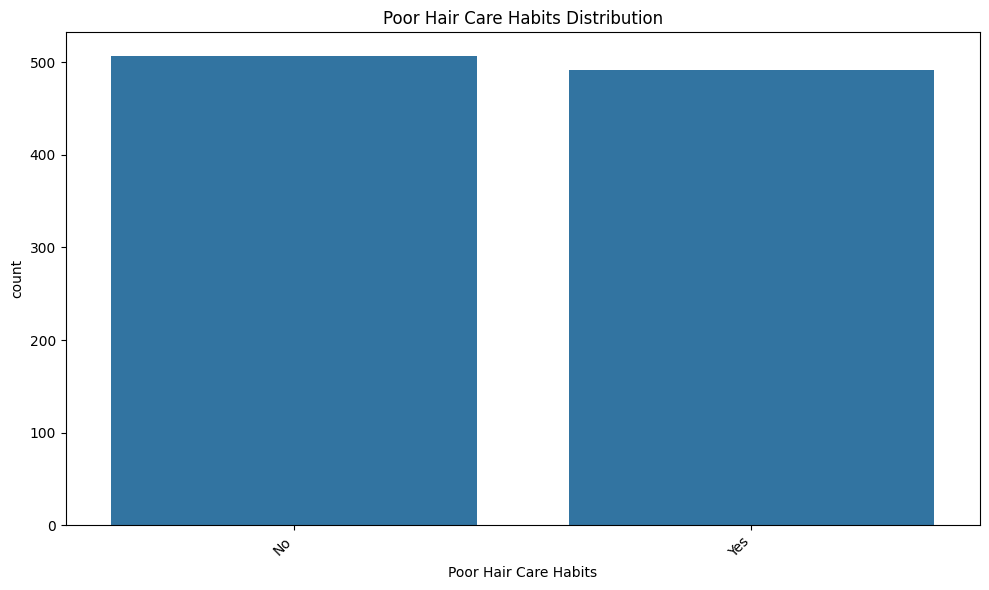

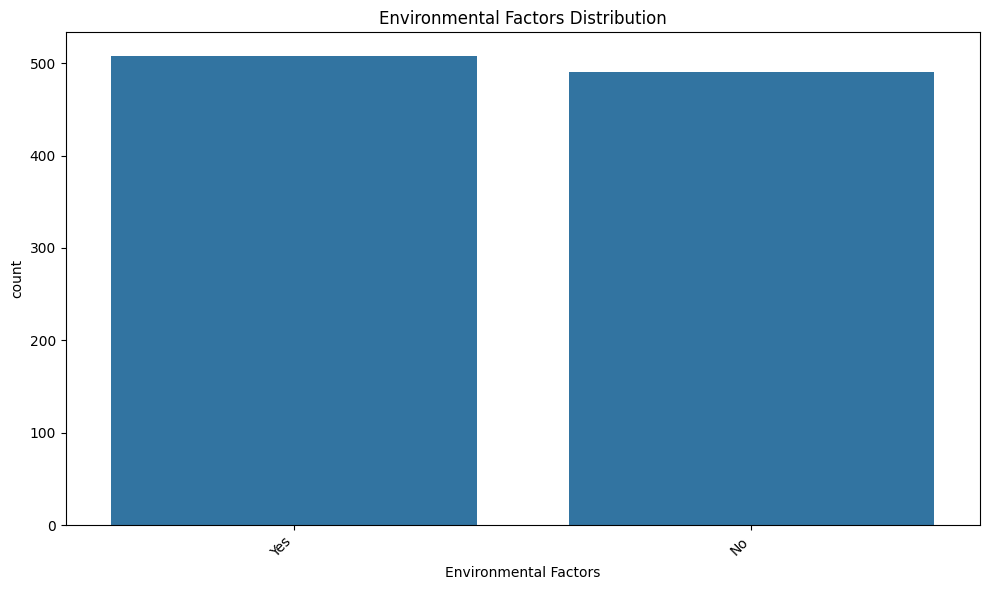

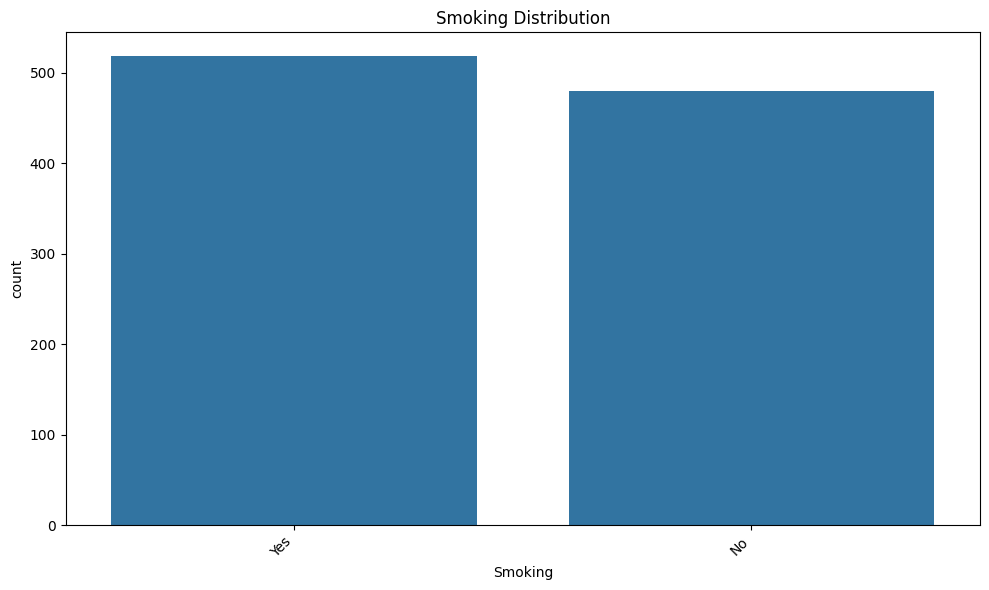

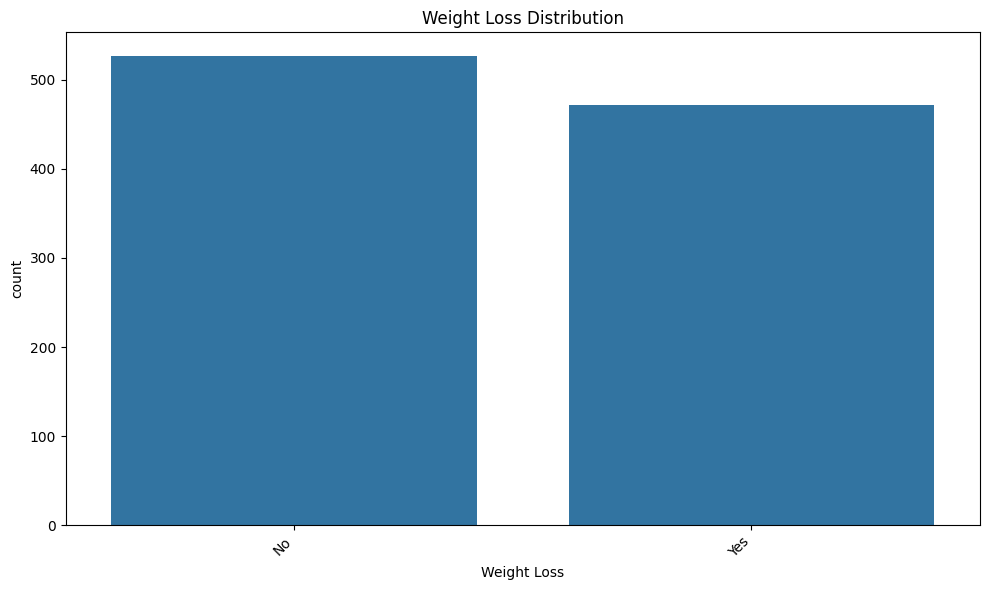

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Categorical Columns
categorical_cols = ['Genetics', 'Hormonal Changes', 'Medical Conditions',
                    'Medications & Treatments', 'Nutritional Deficiencies', 'Stress',
                    'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))  # Adjust size for clarity
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45, ha='right')  # Rotate and right-align labels
    plt.tight_layout()  # Fix overlapping issues
    plt.show()

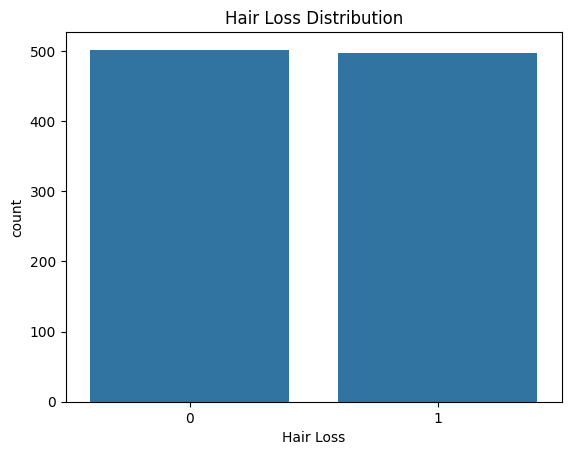

In [112]:
# Hair Loss (Target Variable)
sns.countplot(x='Hair Loss', data=df)
plt.title('Hair Loss Distribution')
plt.show()

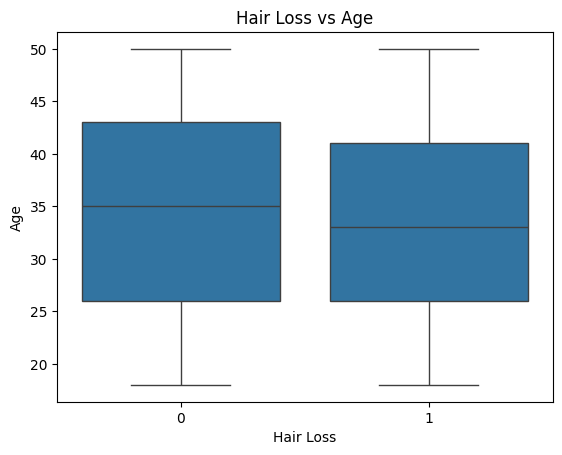

In [113]:
# Hair Loss vs Age
sns.boxplot(x='Hair Loss', y='Age', data=df)
plt.title('Hair Loss vs Age')
plt.show()


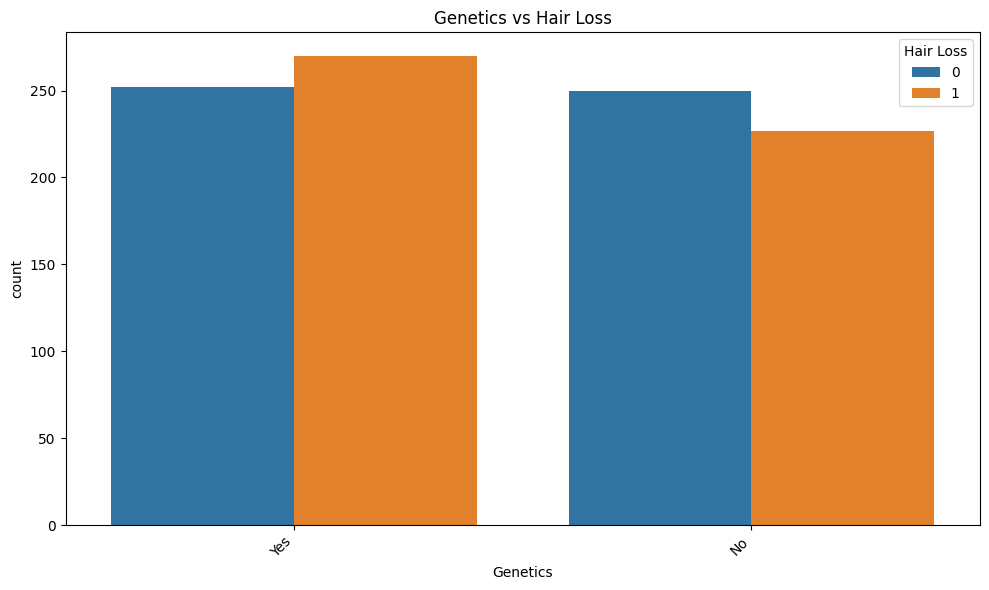

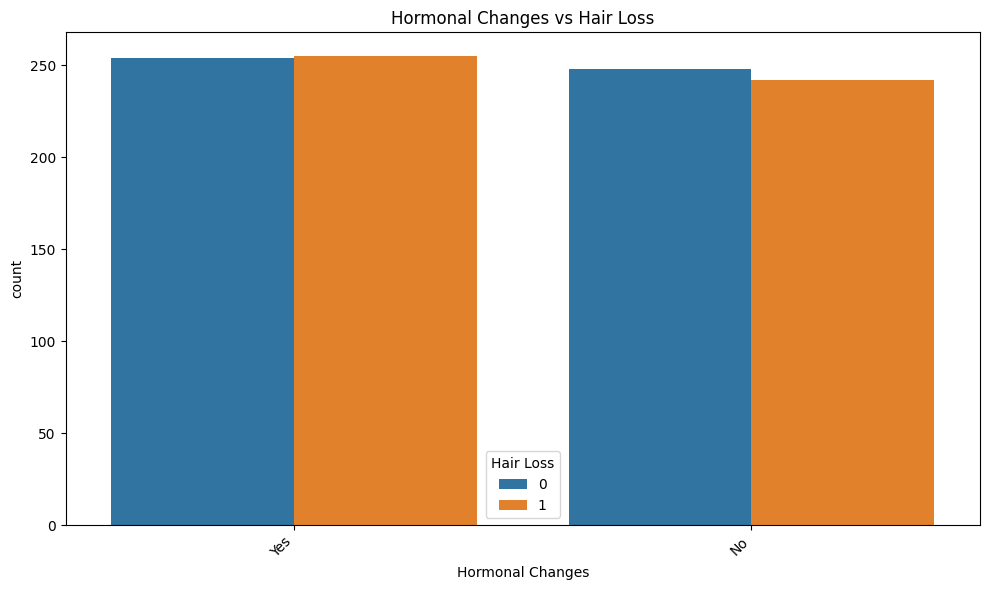

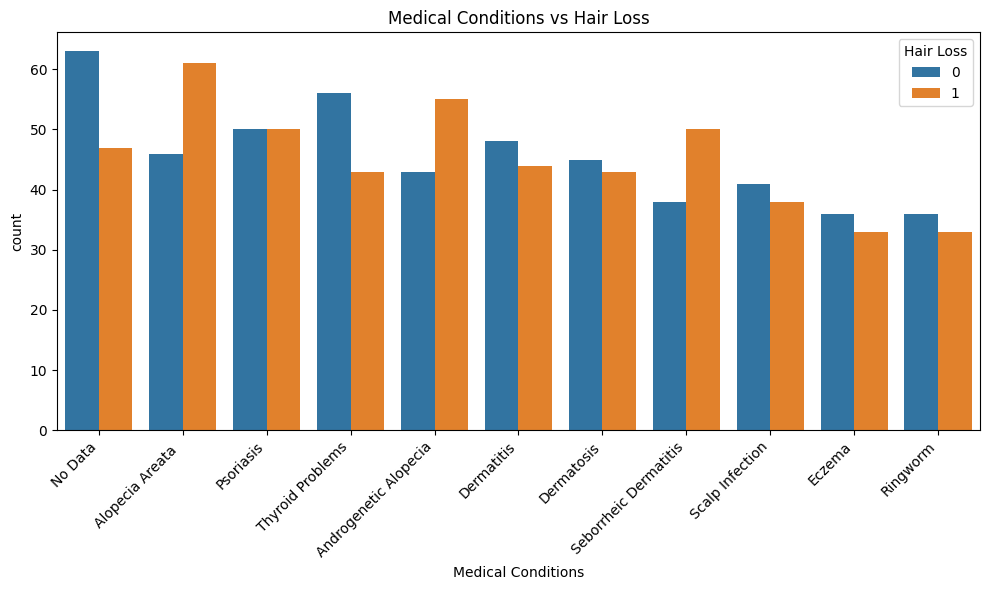

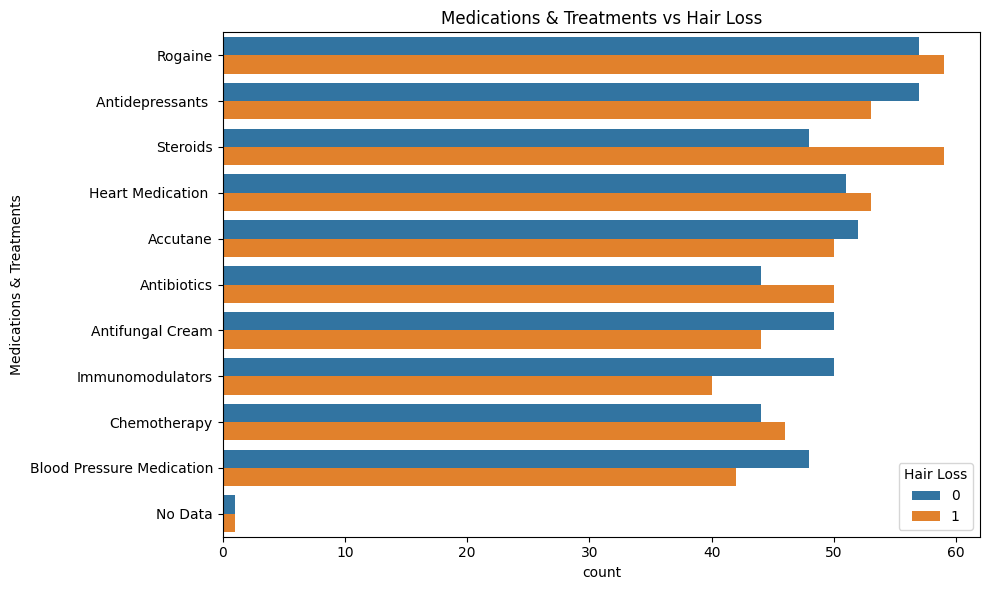

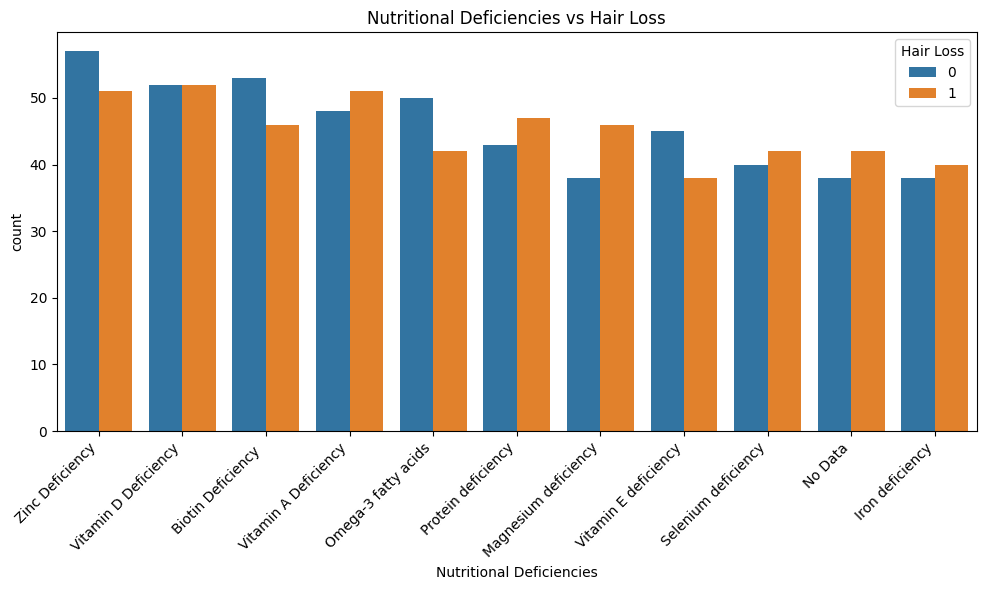

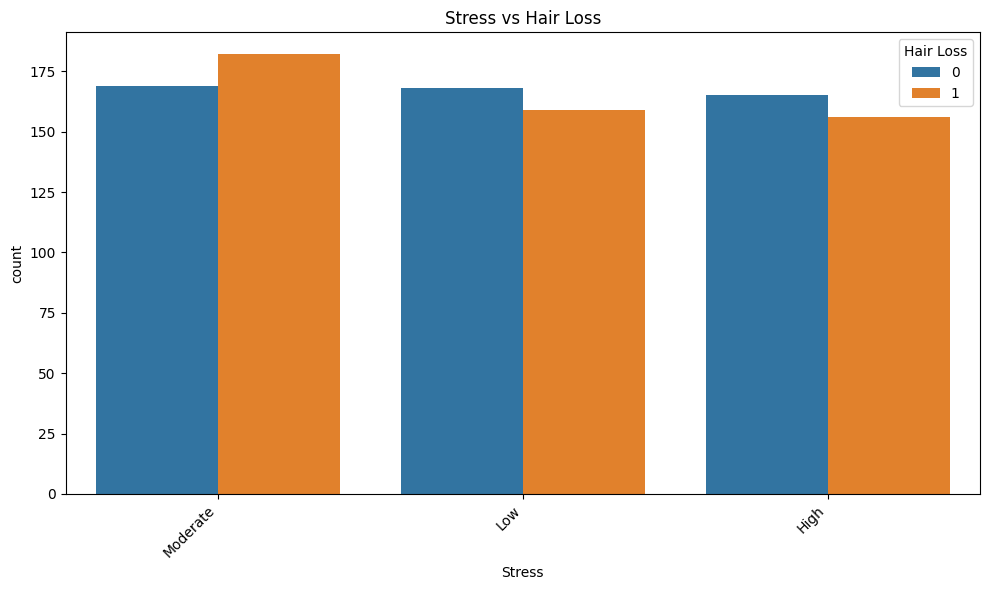

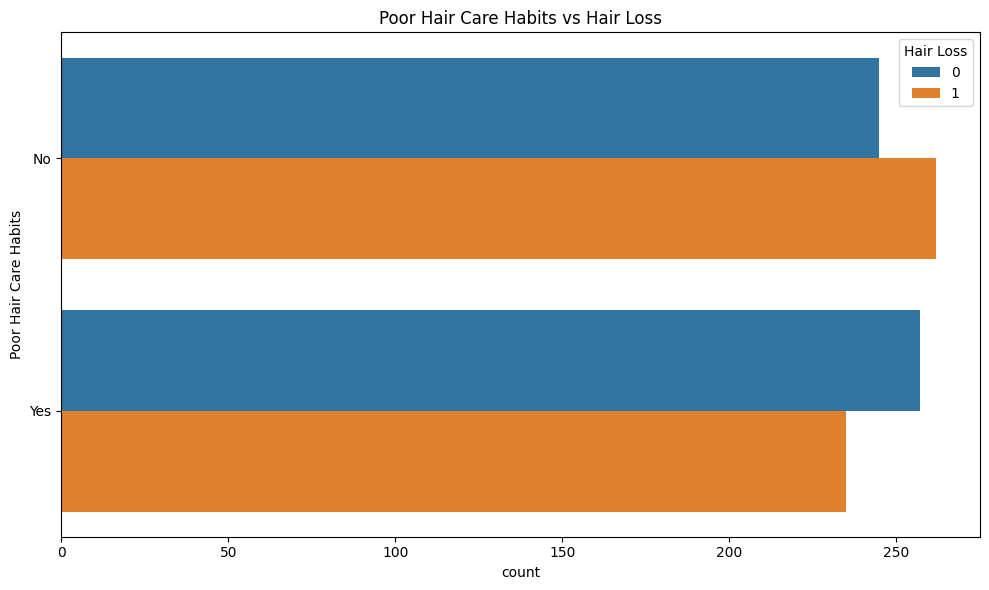

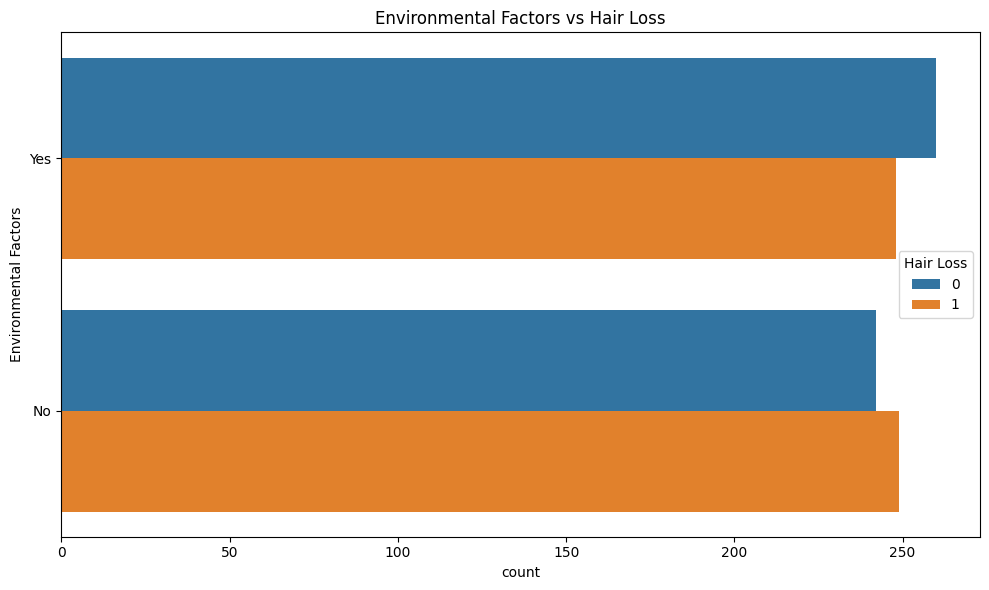

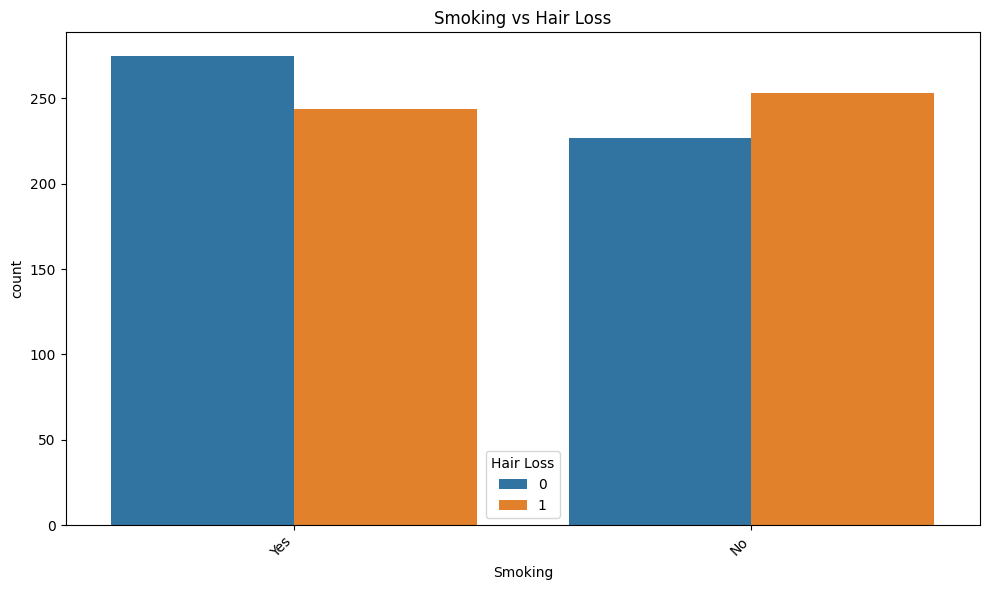

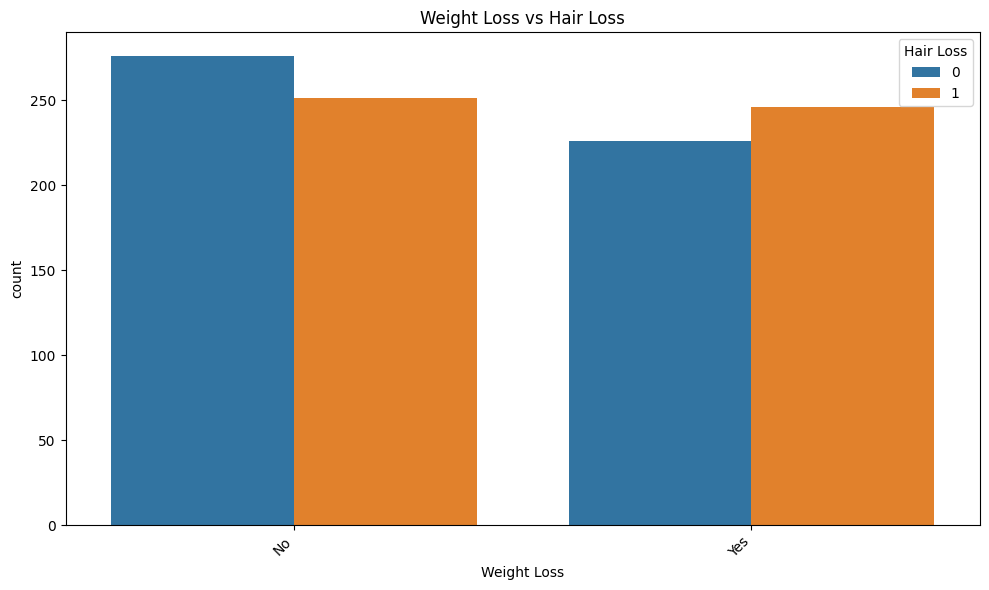

In [132]:
# List of categorical columns
categorical_cols = ['Genetics', 'Hormonal Changes', 'Medical Conditions',
                    'Medications & Treatments', 'Nutritional Deficiencies', 'Stress',
                    'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss']

# Features where horizontal bar plot is more readable
horizontal_cols = ['Medications & Treatments', 'Poor Hair Care Habits', 'Environmental Factors']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))

    if col in horizontal_cols:
        sns.countplot(y=col, hue='Hair Loss', data=df, order=df[col].value_counts().index)
        plt.title(f'{col} vs Hair Loss')
    else:
        sns.countplot(x=col, hue='Hair Loss', data=df, order=df[col].value_counts().index)
        plt.title(f'{col} vs Hair Loss')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

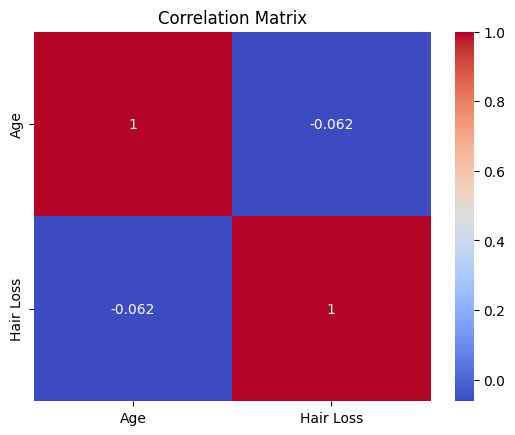

In [115]:
# Correlation (Numerical only)
numeric_corr = df.corr(numeric_only=True)
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Parul\AppData\Local\Temp\ipykernel_8872\2100630522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genetics', data=df, palette='viridis')
d:\hair loss analysis project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


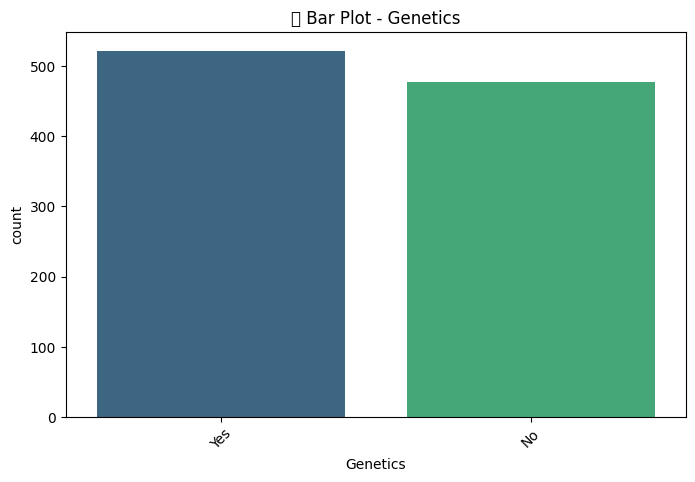

In [116]:
#  Bar Plot (Categorical)

plt.figure(figsize=(8, 5))
sns.countplot(x='Genetics', data=df, palette='viridis')
plt.title('📋 Bar Plot - Genetics')
plt.xticks(rotation=45)
plt.show()

d:\hair loss analysis project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


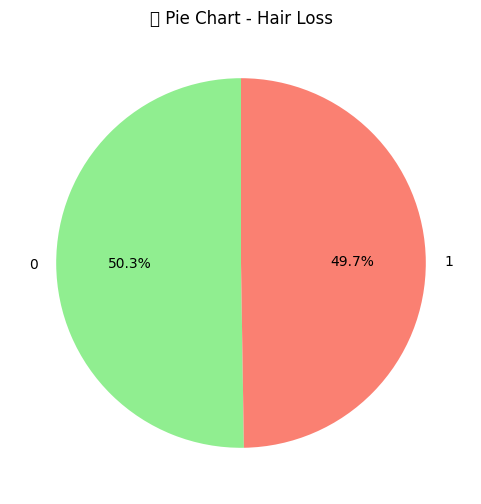

In [117]:
# Pie Chart (Target Distribution)

plt.figure(figsize=(6, 6))
df['Hair Loss'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('🥧 Pie Chart - Hair Loss')
plt.ylabel('')
plt.show()

Feature Engineering

In [118]:
# Bin ages into groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 35, 50, 100], 
                         labels=['Teen', 'Young Adult', 'Middle Aged', 'Senior'])
df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,19,Teen
1,43,Middle Aged
2,26,Young Adult
3,46,Middle Aged
4,30,Young Adult


In [119]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,Hair Loss,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,Medical Conditions_Psoriasis,...,Nutritional Deficiencies_Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits_Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss_Yes,Age_Group_Young Adult,Age_Group_Middle Aged,Age_Group_Senior
0,19,0,True,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,False,False,False
1,43,0,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
2,26,0,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,True,True,False,False
3,46,0,True,True,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
4,30,1,False,False,False,False,False,False,False,True,...,False,False,True,False,True,True,False,True,False,False


In [120]:
# Combine stress and medical conditions
df['Stress_Medical'] = df['Stress'].astype(str) + "_" + df['Medical Conditions'].astype(str)
df['Stress_Medical'].head()

0       Moderate_No Data
1            High_Eczema
2    Moderate_Dermatosis
3      Moderate_Ringworm
4     Moderate_Psoriasis
Name: Stress_Medical, dtype: object

In [121]:
# Scale the Age column
scaler = StandardScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])
df_encoded[['Age']].head()

,Age
0,-1.620370
1,0.940099
2,-0.873567
3,1.260157
4,-0.446822


In [122]:
# Summary Statistics
print("🔍 Summary Statistics:")
display(df.describe(include='all'))

🔍 Summary Statistics:


,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Age_Group,Stress_Medical
count,999,999,999,999,999,999,999.000000,999,999,999,999,999.000000,999,999
unique,2,2,11,11,11,3,NaN,2,2,2,2,NaN,3,33
top,Yes,Yes,No Data,Rogaine,Zinc Deficiency,Moderate,NaN,No,Yes,Yes,No,NaN,Young Adult,High_No Data
freq,522,509,110,116,108,351,NaN,507,508,519,527,NaN,457,67
mean,NaN,NaN,NaN,NaN,NaN,NaN,34.188188,NaN,NaN,NaN,NaN,0.497497,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,9.377980,NaN,NaN,NaN,NaN,0.500244,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [123]:
# Age Binning
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 35, 50, 100], 
                         labels=['Teen', 'Young Adult', 'Middle Aged', 'Senior'])


In [124]:
# Interaction Feature
df['Stress_Medical'] = df['Stress'].astype(str) + '_' + df['Medical Conditions'].astype(str)

In [125]:
# One-hot Encoding (excluding target)
df_encoded = pd.get_dummies(df.drop(columns=['Hair Loss']), drop_first=True)

In [126]:
# Scaling Age
scaler = StandardScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])

In [127]:
# Add target back
df_encoded['Hair Loss'] = df['Hair Loss']

Feature Selection

In [128]:
# Correlation Filter (top 10 correlated with target)
corr_with_target = df_encoded.corr(numeric_only=True)['Hair Loss'].abs().sort_values(ascending=False)
top_corr_features = corr_with_target[1:11]  # exclude 'Hair Loss' itself
print("Top correlated features:\n", top_corr_features)

Top correlated features:
 Stress_Medical_Moderate_Seborrheic Dermatitis    0.080498
Stress_Medical_Moderate_Androgenetic Alopecia    0.073483
Age_Group_Middle Aged                            0.063742
Age                                              0.062481
Smoking_Yes                                      0.056906
Stress_Medical_High_Scalp Infection              0.056390
Age_Group_Young Adult                            0.054829
Stress_Medical_Moderate_Scalp Infection          0.049480
Medical Conditions_No Data                       0.049405
Stress_Medical_Low_No Data                       0.048831
Name: Hair Loss, dtype: float64


In [129]:
# Chi-Squared (Only for categorical X, categorical Y)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# 🎯 Separate features (X) and target (y)
X = df_encoded.drop(columns=['Hair Loss'])
y = df_encoded['Hair Loss'].astype(int)

# 🧼 Scale all features to [0,1] range to meet chi2 requirement
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔍 Select top k features using Chi-Squared test
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_scaled, y)

# 🏷️ Get names of selected features
chi2_features = X.columns[chi2_selector.get_support()]
print("✅ Top 10 Chi-squared Features:\n")
print(chi2_features)


✅ Top 10 Chi-squared Features:

Index(['Medical Conditions_No Data',
       'Medical Conditions_Seborrheic Dermatitis', 'Age_Group_Middle Aged',
       'Stress_Medical_High_Scalp Infection', 'Stress_Medical_Low_Eczema',
       'Stress_Medical_Low_No Data',
       'Stress_Medical_Moderate_Androgenetic Alopecia',
       'Stress_Medical_Moderate_Scalp Infection',
       'Stress_Medical_Moderate_Seborrheic Dermatitis',
       'Stress_Medical_Moderate_Thyroid Problems'],
      dtype='object')



Top Tree-based features:
 Age                                              0.127810
Weight Loss_Yes                                  0.035928
Environmental Factors_Yes                        0.035624
Hormonal Changes_Yes                             0.034455
Poor Hair Care Habits_Yes                        0.033249
Genetics_Yes                                     0.032038
Smoking_Yes                                      0.031899
Nutritional Deficiencies_Vitamin D Deficiency    0.019220
Stress_Moderate                                  0.019152
Medications & Treatments_Chemotherapy            0.017989
dtype: float64


d:\hair loss analysis project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


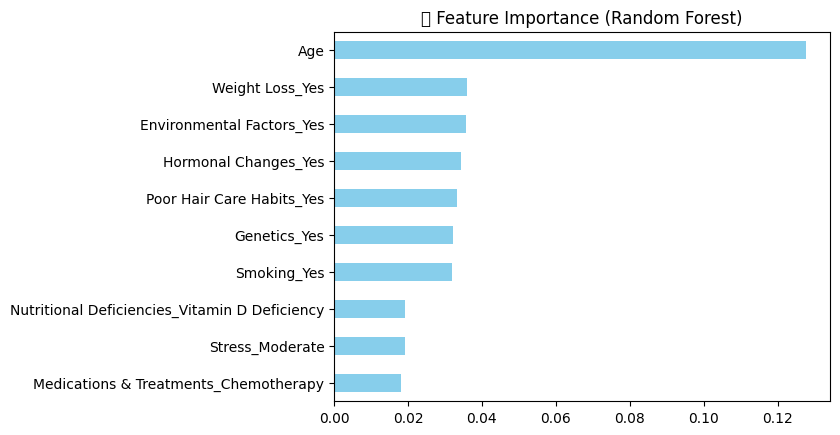

In [130]:
# Tree-based (Random Forest Importance)
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = pd.Series(forest.feature_importances_, index=X.columns)
top_importances = importances.sort_values(ascending=False).head(10)
print("\nTop Tree-based features:\n", top_importances)

# Bar plot for tree-based
top_importances.plot(kind='barh', color='skyblue')
plt.title("🌲 Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()